In [56]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C://Users/anush/Desktop/ObesityDataSet_raw_and_data_sinthetic.csv")

# Display the first few rows
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
print(df.isnull().sum())


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [60]:
# Basic statistics of the dataset
print(df.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

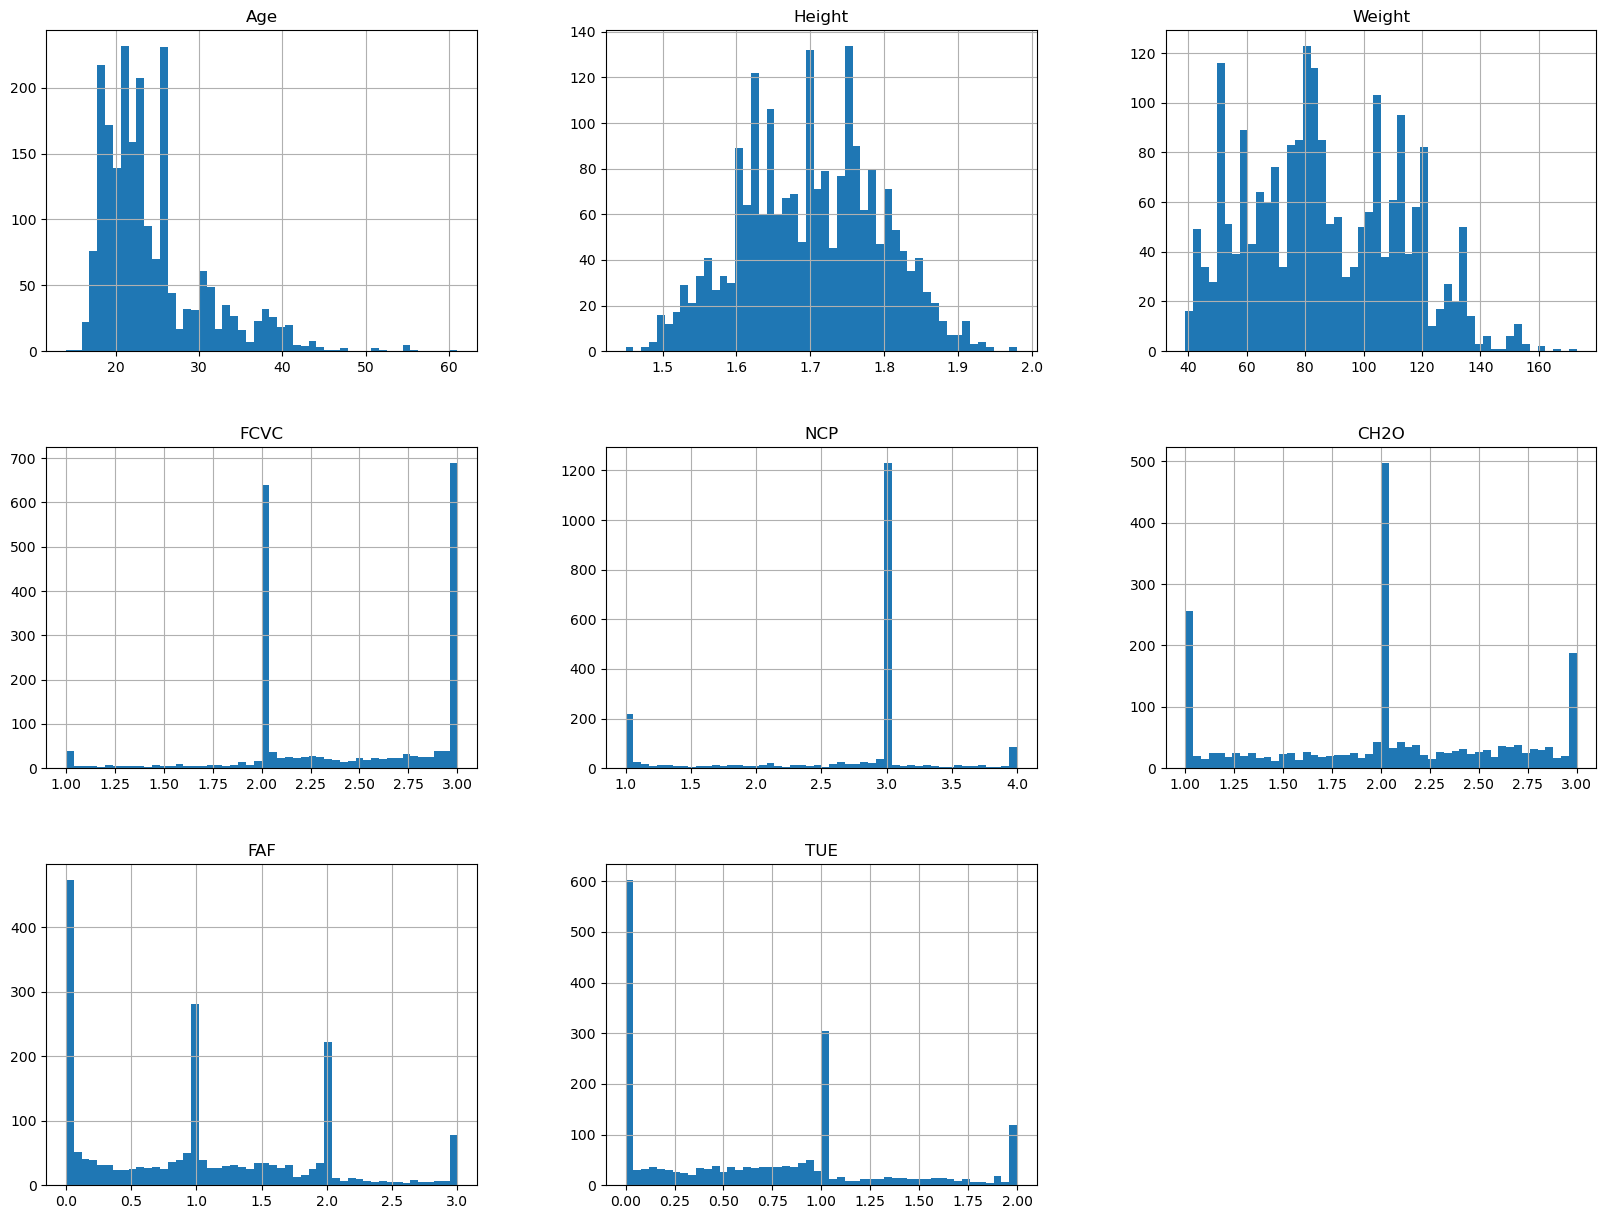

In [62]:
# Visualize the distribution of numerical variables
df.hist(bins=50, figsize=(20, 15))
plt.show()


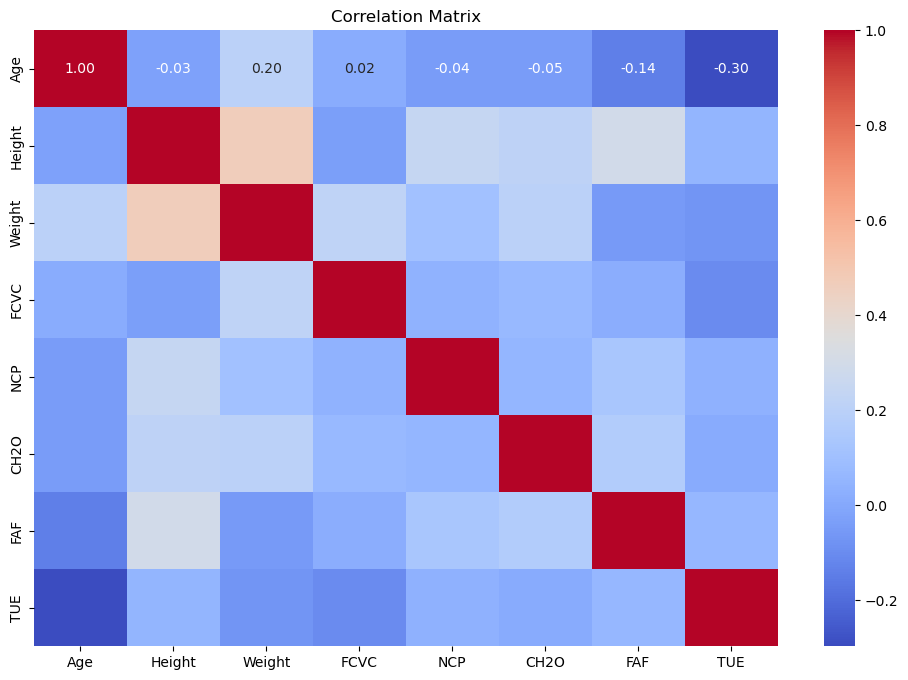

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_cols]

# Compute the correlation matrix
corr_matrix = df_numerical.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


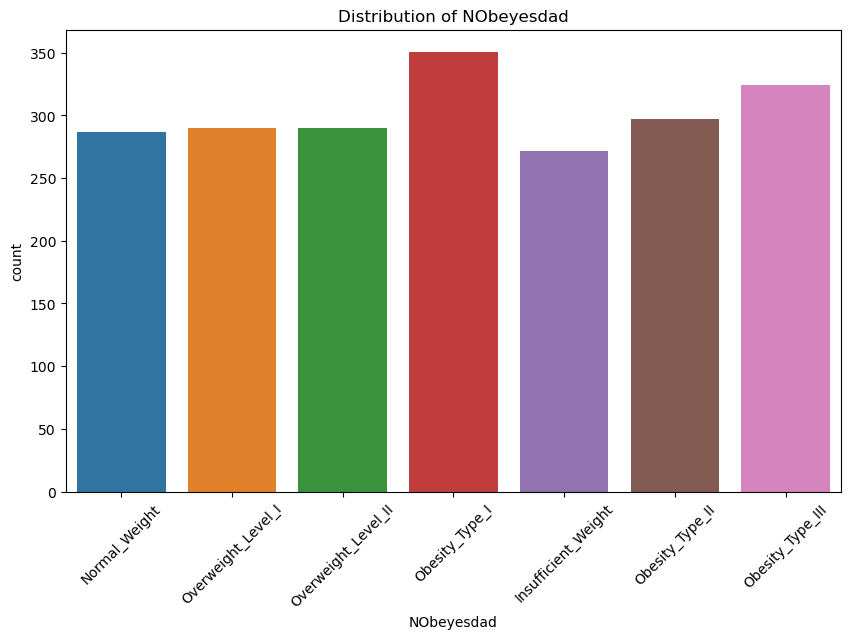

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=df)
plt.title('Distribution of NObeyesdad')
plt.xticks(rotation=45)
plt.show()


In [65]:
# Define features and target variable
y = df['NObeyesdad']
X = df.drop('NObeyesdad', axis=1)

In [66]:
# Convert categorical variables into numerical representations
X = pd.get_dummies(X, drop_first=True)

In [67]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [76]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.9550827423167849
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.96      0.97        56
      Normal_Weight       0.87      0.95      0.91        62
     Obesity_Type_I       0.99      0.94      0.96        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.96      0.88      0.92        56
Overweight_Level_II       0.92      0.98      0.95        50

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.95       423
       weighted avg       0.96      0.96      0.96       423

Confusion Matrix:
[[54  2  0  0  0  0  0]
 [ 1 59  0  0  0  1  1]
 [ 0  1 73  2  0  0  2]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  6  0  0  0 49  1]
 [ 0  0  0  0  0  1 49]]
